In [15]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm



import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from costfunction import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Vanishing Gradient, Data Generation

In [16]:
n=1
d=10
models = loader(data_path("vanishing_grad_reps_1"))

grad_average = np.array([np.mean(np.abs(grad)) for grad in models[0].weight_gradient_list]).reshape(1,-1)
input_partial = []
weight_partial = []
for layer in models[0].layers:
    input_partial.append(np.mean(np.abs(layer.input_partial)))
    weight_partial.append(np.mean(np.abs(layer.weight_partial)))
    
input_partial = np.array(input_partial)
weight_partial = np.array(weight_partial)
input_partial_avg = np.mean(input_partial)

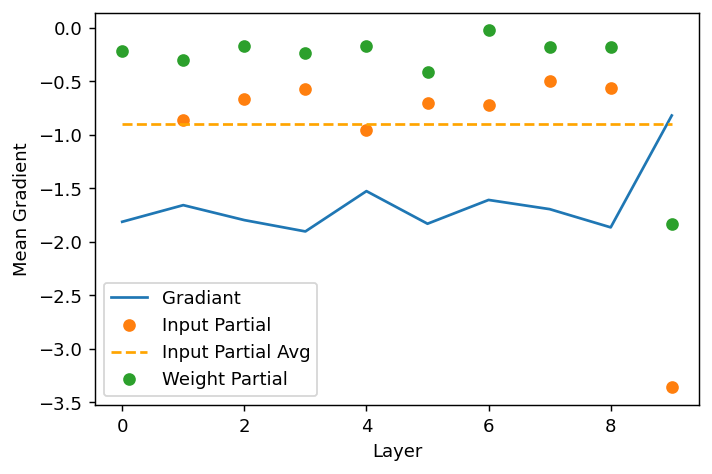

In [17]:
mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)


spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.plot(spacing[1:], np.log(input_partial[1:]), "o")
plt.plot([spacing[0], spacing[-1]], [np.log(input_partial_avg),np.log(input_partial_avg)] , "--", color="orange")
plt.plot(spacing, np.log(weight_partial), "o")


plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.legend(["Gradiant", "Input Partial", "Input Partial Avg","Weight Partial"])
plt.show()

In [18]:
n=1
d=10
models = loader(data_path("vanishing_grad_reps_2"))

grad_average = np.array([np.mean(np.abs(grad)) for grad in models[0].weight_gradient_list]).reshape(1,-1)
input_partial = []
weight_partial = []
for layer in models[0].layers:
    input_partial.append(np.mean(np.abs(layer.input_partial)))
    weight_partial.append(np.mean(np.abs(layer.weight_partial)))
    
input_partial = np.array(input_partial)
weight_partial = np.array(weight_partial)
input_partial_avg = np.mean(input_partial)

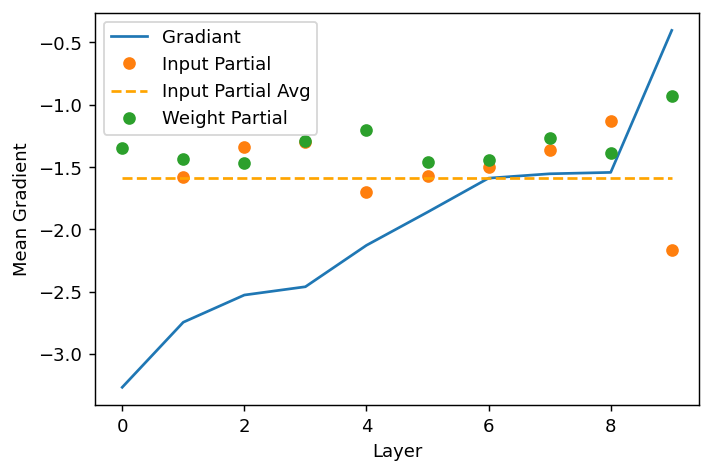

In [19]:
mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)


spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.plot(spacing[1:], np.log(input_partial[1:]), "o")
plt.plot([spacing[0],spacing[-1]], [np.log(input_partial_avg),np.log(input_partial_avg)] , "--", color="orange")
plt.plot(spacing, np.log(weight_partial), "o")


plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.legend(["Gradiant", "Input Partial", "Input Partial Avg","Weight Partial"])
plt.show()

In [65]:
n=1
d=10
models = loader(data_path("vanishing_grad_reps_3"))

grad_average = np.array([np.mean(np.abs(grad)) for grad in models[0].weight_gradient_list]).reshape(1,-1)
input_partial = []
weight_partial = []
for layer in models[0].layers:
    input_partial.append(np.mean(np.abs(layer.input_partial)))
    weight_partial.append(np.mean(np.abs(layer.weight_partial)))
    
input_partial = np.array(input_partial)
weight_partial = np.array(weight_partial)
input_partial_avg = np.mean(input_partial)

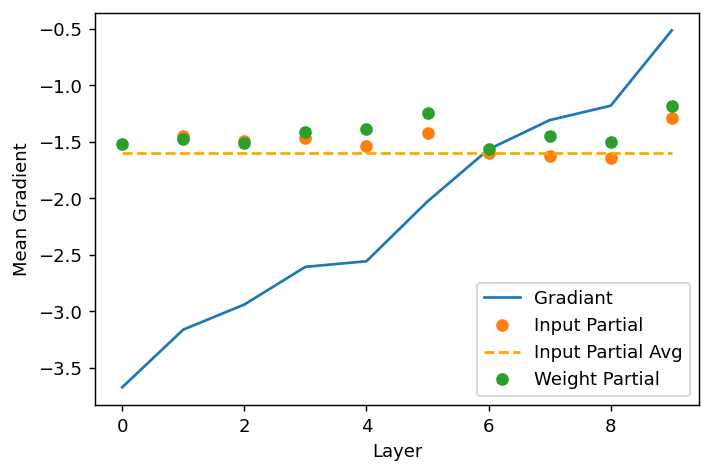

In [66]:
mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)


spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.plot(spacing[1:], np.log(input_partial[1:]), "o")
plt.plot([spacing[0],spacing[-1]], [np.log(input_partial_avg),np.log(input_partial_avg)] , "--", color="orange")
plt.plot(spacing, np.log(weight_partial), "o")


plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.legend(["Gradiant", "Input Partial", "Input Partial Avg","Weight Partial"])
plt.show()

In [67]:
n=1
d=10
models = loader(data_path("vanishing_grad_reps_4"))

grad_average = np.array([np.mean(np.abs(grad)) for grad in models[0].weight_gradient_list]).reshape(1,-1)
input_partial = []
weight_partial = []
for layer in models[0].layers:
    input_partial.append(np.mean(np.abs(layer.input_partial)))
    weight_partial.append(np.mean(np.abs(layer.weight_partial)))
    
input_partial = np.array(input_partial)
weight_partial = np.array(weight_partial)
input_partial_avg = np.mean(input_partial)

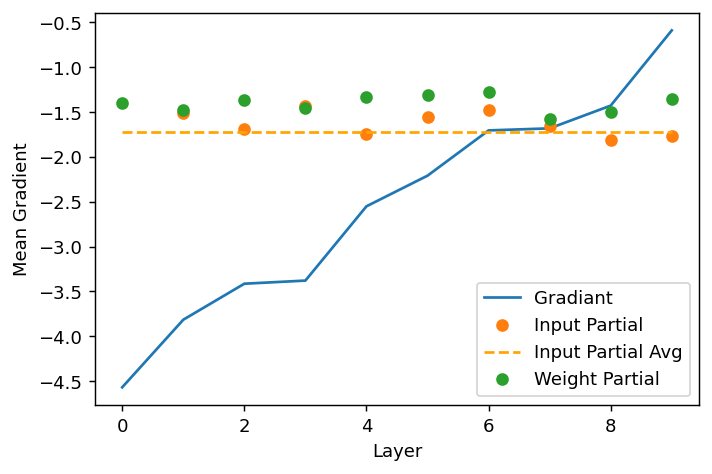

In [68]:
mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)


spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.plot(spacing[1:], np.log(input_partial[1:]), "o")
plt.plot([spacing[0],spacing[-1]], [np.log(input_partial_avg),np.log(input_partial_avg)] , "--", color="orange")
plt.plot(spacing, np.log(weight_partial), "o")


plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.legend(["Gradiant", "Input Partial", "Input Partial Avg","Weight Partial"])
plt.show()

In [69]:
n=1
d=10
models = loader(data_path("vanishing_grad_dnn"))

grad_average = np.array([np.mean(np.abs(grad)) for grad in models[0].weight_gradient_list]).reshape(1,-1)

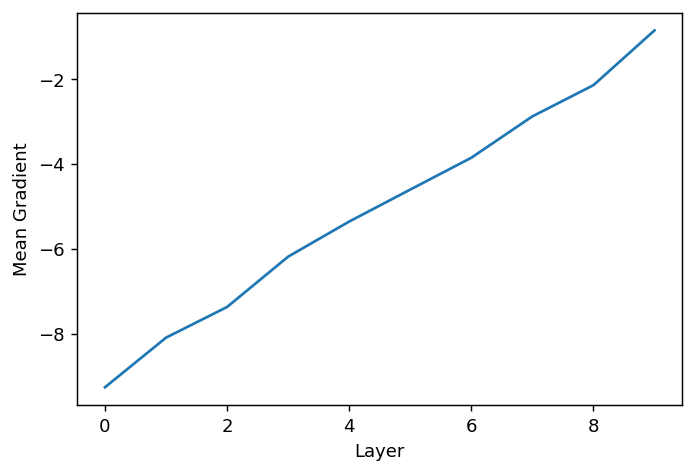

In [21]:
mean = np.mean(grad_average, axis=0)
#std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
#log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
#plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()